In [1]:
print(34)

34


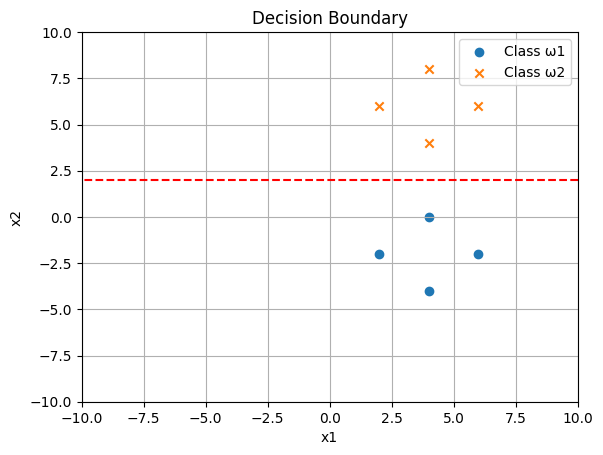

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Given data
X1 = np.array([[2, -2], [4, -4], [4, 0], [6, -2]])
X2 = np.array([[2, 6], [4, 4], [4, 8], [6, 6]])
P_w1 = 0.5
P_w2 = 0.5
cov_matrix = np.array([[8/3, 0], [0, 8/3]])

# Calculate the mean vectors for each class
mean_w1 = np.mean(X1, axis=0)
mean_w2 = np.mean(X2, axis=0)

# Create multivariate normal distributions for each class
mvn_w1 = multivariate_normal(mean=mean_w1, cov=cov_matrix)
mvn_w2 = multivariate_normal(mean=mean_w2, cov=cov_matrix)

# Define the decision boundary function
def decision_boundary(x):
    return np.log(P_w1 * mvn_w1.pdf(x)) - np.log(P_w2 * mvn_w2.pdf(x))

# Create a grid of points for visualization
x_vals = np.linspace(-10, 10, 100)
y_vals = np.linspace(-10, 10, 100)
X_grid, Y_grid = np.meshgrid(x_vals, y_vals)
Z = np.zeros_like(X_grid)

# Calculate decision boundary values
for i in range(X_grid.shape[0]):
    for j in range(X_grid.shape[1]):
        Z[i, j] = decision_boundary([X_grid[i, j], Y_grid[i, j]])

# Plot the decision boundary
plt.contour(X_grid, Y_grid, Z, levels=[0], colors='r', linestyles='dashed')
plt.scatter(X1[:, 0], X1[:, 1], label='Class ω1', marker='o')
plt.scatter(X2[:, 0], X2[:, 1], label='Class ω2', marker='x')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Decision Boundary')
plt.legend()
plt.grid(True)
plt.show()

In [2]:
import sympy as sp

# Define the variables
d = sp.Symbol('d')
X = sp.Matrix(sp.symbols('x1:%d' % (d + 1)))
mu = sp.Matrix(sp.symbols('mu1:%d' % (d + 1)))
sigma = sp.Matrix(sp.symbols('sigma1:%d' % (d + 1)))

# Define the multivariate normal density
pdf = 1 / (sp.prod(sp.sqrt(2 * sp.pi * sigma))) * sp.exp(-0.5 * sp.summation(((X[i] - mu[i]) / sigma[i])**2, (i, 0, d - 1)))

# Print the result
print(f"The evidence p(X) is:\n{pdf}")



TypeError: %d format: a real number is required, not Add

In [1]:
import numpy as np
from scipy.linalg import inv, det

def multivariate_normal_density(X, mu, sigma):
    """
    Calculates the evidence (probability density) of a multivariate normal distribution.

    Args:
        X (np.ndarray): Data point (d-dimensional vector).
        mu (np.ndarray): Mean vector (d-dimensional).
        sigma (np.ndarray): Diagonal covariance matrix (d x d).

    Returns:
        float: Evidence (probability density).
    """
    d = len(X)
    det_sigma = np.prod(sigma)
    inv_sigma = inv(np.diag(sigma))
    exponent = -0.5 * np.dot(np.dot((X - mu).T, inv_sigma), (X - mu))
    prefactor = 1 / ((2 * np.pi) ** (d / 2) * np.sqrt(det_sigma))
    return prefactor * np.exp(exponent)

def mahalanobis_distance(X, mu, sigma):
    """
    Calculates the Mahalanobis distance from X to mu.

    Args:
        X (np.ndarray): Data point (d-dimensional vector).
        mu (np.ndarray): Mean vector (d-dimensional).
        sigma (np.ndarray): Diagonal covariance matrix (d x d).

    Returns:
        float: Mahalanobis distance.
    """
    d = len(X)
    inv_sigma = inv(np.diag(sigma))
    return np.sqrt(np.sum(((X - mu) / np.sqrt(sigma)) ** 2))

# Example usage:
mean_vector = np.array([1, 2, 3])
covariance_matrix = np.array([2, 3, 4])  # Diagonal covariance matrix
data_point = np.array([0.5, 1.5, 2.5])

# Calculate evidence
evidence = multivariate_normal_density(data_point, mean_vector, covariance_matrix)
print(f"Evidence for the given data point: {evidence:.6f}")

# Calculate Mahalanobis distance
mahalanobis_dist = mahalanobis_distance(data_point, mean_vector, covariance_matrix)
print(f"Mahalanobis distance from the data point to the mean: {mahalanobis_dist:.6f}")

Evidence for the given data point: 0.011319
Mahalanobis distance from the data point to the mean: 0.520416
